# TP7 - Evaluation Partie 2

Cette 2nde partie du TP est consacrée à l'étude d'un jeu de données plus complexe. Dont la tâche est décrite ci-après. Vous devrez proposer un "cahier d'expérience" qui vous amènera à la définition d'un "modèle final". 

Le fichier `adult_dev.data` contient les descriptions de 7,000 personnes décrites selon les variables telles que l'âge, le sexe, le niveau d'éducation, le statut matrimonial, la profession, la race, le pays d'origine, la capital-gain, la capital-loss et le nombre d'heures travaillées par semaine. La variable cible de cette base de données est la variable binaire "Salary", qui prend les valeurs de ">50K" si le revenu annuel est supérieur à 50 000 dollars et "<=50K" sinon.


## Votre cahier d'expériences

Vous devez proposer dans cette partie toutes les expérimentations que vous allez entreprendre pour tenter de mettre au point le meilleur modèle de prédiction possible.

Structurez votre notebook (alternez cellules markdown puis cellules de codes) de sorte à ce qu'il puisse être lu comme un compte-rendu de TP et exécuté.

In [2]:
# TODO

I) Faire un arbre

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

salaires = pd.read_csv('donnees/adult_dev.data', delimiter=";")

print("taille du dataframe:", salaires.shape)

/tmp/ipykernel_72506/3232774477.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


taille du dataframe: (7000, 15)


II) Séparer les descripteurs et le salaire

In [4]:
X = salaires.iloc[:, :-1].values
y = salaires.iloc[:, -1].values

print("X:", X.shape)
print("y:", y.shape)

X: (7000, 14)
y: (7000,)


III) Transformer la matrice en matrice binaire

In [5]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
encoder.fit(X)
Xbin = encoder.transform(X)

IV) Découpage en train et test

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Xbin, y, test_size=0.5, random_state=0)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (3500, 6635)
X_test: (3500, 6635)
y_train: (3500,)
y_test: (3500,)


V) Apprentissage d'un arbre de décision

In [13]:
from sklearn import tree

dtree = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=100)
dtree = dtree.fit(X_train, y_train)

y_pred = dtree.predict(X_test)

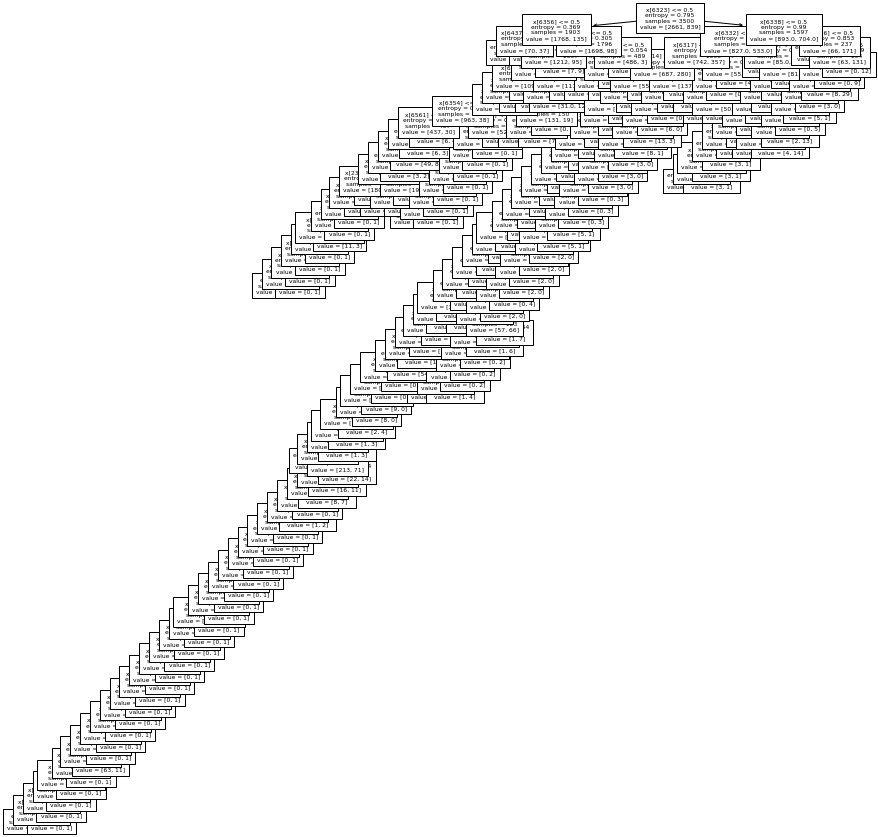

In [14]:
# visualisation de l'arbre
plt.figure(figsize=(15,15))
tree.plot_tree(dtree, fontsize=6)
plt.show()

In [15]:
print(encoder.get_feature_names_out())
print(encoder.categories_)

['x0_17' 'x0_18' 'x0_19' ... 'x13_ United-States' 'x13_ Vietnam'
 'x13_ Yugoslavia']
[array([17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       88, 90], dtype=object), array([' ?', ' Federal-gov', ' Local-gov', ' Never-worked', ' Private',
       ' Self-emp-inc', ' Self-emp-not-inc', ' State-gov', ' Without-pay'],
      dtype=object), array([18827, 19395, 19520, ..., 1161363, 1455435, 1484705], dtype=object), array([' 10th', ' 11th', ' 12th', ' 1st-4th', ' 5th-6th', ' 7th-8th',
       ' 9th', ' Assoc-acdm', ' Assoc-voc', ' Bachelors', ' Doctorate',
       ' HS-grad', ' Masters', ' Preschool', ' Prof-school',
       ' Some-college'], dtype=object), array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
      dtype=object), array([' Di

VI) Vérification over-fitting

In [16]:
train_error = 1 - dtree.score(X_train, y_train)
test_error = 1 - dtree.score(X_test, y_test)

print("Taux d'erreur d'apprentissage:", train_error)
print("Taux d'erreur de test:", test_error)

Taux d'erreur d'apprentissage: 0.1131428571428571
Taux d'erreur de test: 0.16542857142857148


## Votre modèle final

In [17]:
# définissez ici le modèle que vous aurez finalement choisi
model = dtree

In [24]:
# prédictions de votre modèle sur de nouvelles données
eval_set = pd.read_csv('donnees/adult_eval.data', delimiter=";")  # ne pas modifier cette ligne

# votre traitement sur eval_set (à adapter)
X_eval = np.array(eval_set)
predictions = model.predict(X_eval)

print(predictions)

ValueError: could not convert string to float: ' Private'

In [ ]:
# cadre réservé à votre enseignant pour l'évaluation des prédictions de votre modèle
# 
# 